In [411]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [412]:
term_df =  pd.read_csv('term_deposit.csv', sep = ',')

In [413]:
term_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [414]:
term_df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# Description of different attributes in dataframe

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired',
          'self-employed','services','student','technician','unemployed','unknown')
    
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course',
               'university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown
                                     
6 - Balance : (numeric)
       
7 - housing: has housing loan? (categorical: 'no','yes','unknown')
    
8 - loan: has personal loan? (categorical: 'no','yes','unknown')
    
 related with the last contact of the current campaign:
    
9 - contact: contact communication type (categorical: 'cellular','telephone') 
    
10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    
11 - day_of_Month: last contact day of the week (categorical: '1', '2',..,'31')
    
12 - duration: last contact duration, in seconds (numeric).
    
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign
     (numeric; 999 means client was not previously contacted)
        
15 - previous: number of contacts performed before this campaign and for this client (numeric)
    
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success)

17 - Target : 'yes', 'no'
                                                           

In [415]:
term_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- There are total 17 data types of which 7 are integer and 10 are objects.  The object datatypes are to be converted to integer 
  as many algorithms dont work on object data types
  



In [416]:
term_df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


- Duration, pdays and  Campaign parameters are clearly right skewed as median is close towards the min value

- Most of the customers are not contacted in the previous campaign as 75% is also 0

In [417]:
term_df.isnull().count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64

- There are no null data types in the dataset

# UNIVARIATE ANALYSIS OF CONTINOUS VARIABLES

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0C174DAC8>,
      dtype=object)

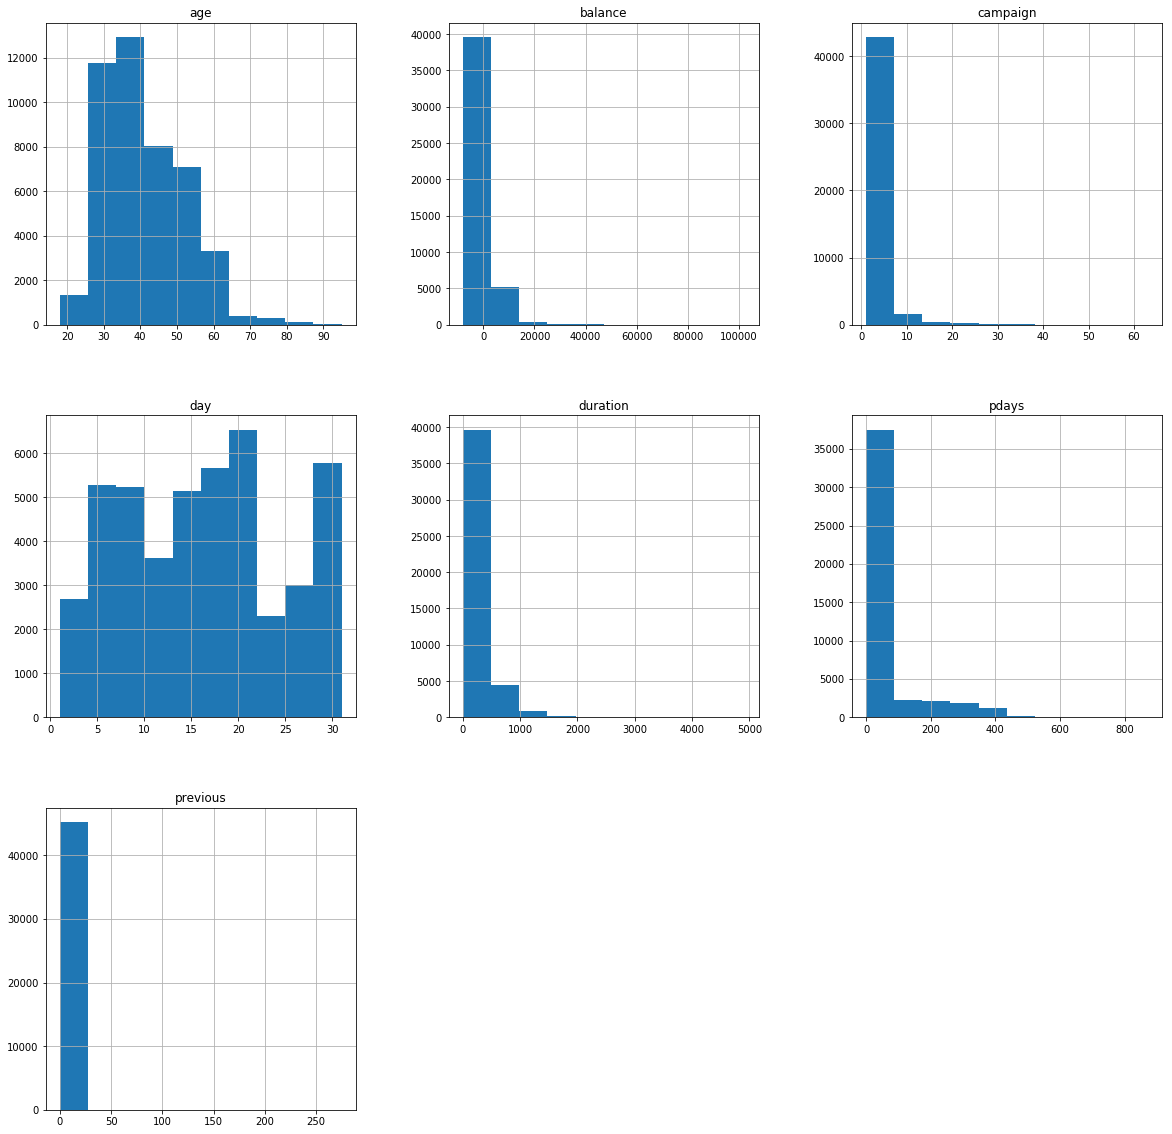

In [418]:
term_df.hist(figsize = (20,20))

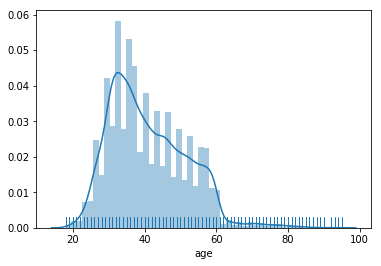

In [419]:
#UNIVARIATE ANALYSIS OF CONTINOUS VARIABLES
#Distplot for age column
sns.distplot(term_df['age'], rug = True)

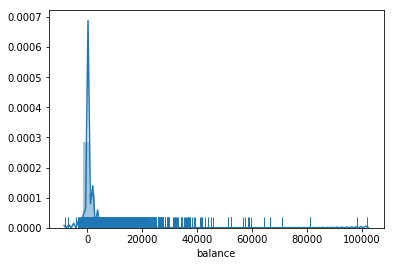

In [420]:
sns.distplot(term_df['balance'],rug = True)

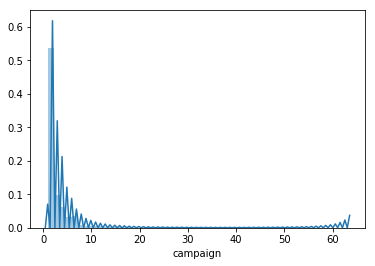

In [421]:
sns.distplot(term_df['campaign'])

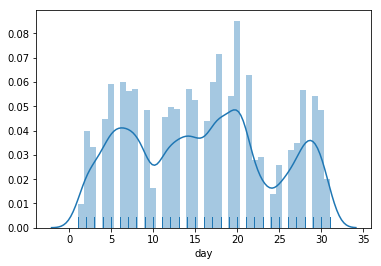

In [422]:
sns.distplot(term_df['day'],rug = True)

Out of the 7 integer datatypes present in the dataset, 5 parameters are right skewed to a large extent as per the histogram

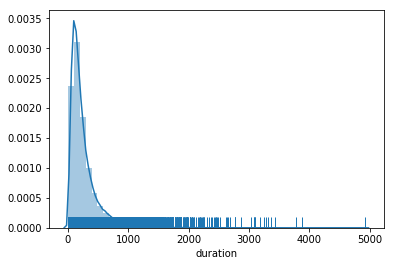

In [423]:
sns.distplot(term_df['duration'], rug = True)

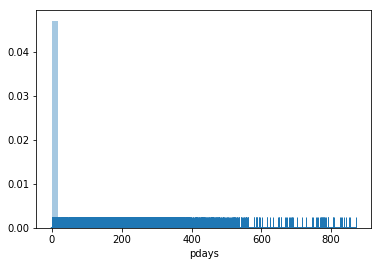

In [424]:
sns.distplot(term_df['pdays'],rug = True)

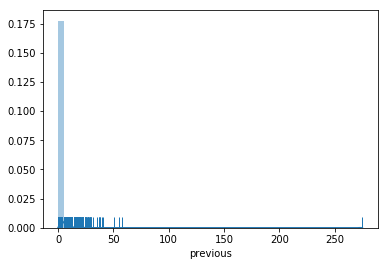

In [425]:
sns.distplot(term_df['previous'],rug = True)

In [426]:
mean_duration = term_df['duration'].mean()
mean_duration

258.1630797814691

In [427]:
term_df[term_df['duration'] > term_df['duration'].mean()].shape[0]

15032

In [428]:
term_df[(term_df['duration'] > term_df['duration'].mean()) & (term_df['Target'] == 'yes')].shape[0] 

3827

Out of the 15032 cases where the duration of contact is greater than average duration, only 25% of the customers said 
'yes' to the promotion.  

# UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES

In [429]:
# COUNT OF DIFFERENT CATEGORICAL VARIABLES

print('JOB COUNTS')
print(term_df['job'].value_counts())
print('-------------------------')

print('MARITAL STATUS')
print(term_df['marital'].value_counts())
print('------------------------------')

print('EDUCATION')
print(term_df['education'].value_counts())
print('------------------------------')

print('HOUSING LOAN')
print(term_df['housing'].value_counts())
print('------------------------------')

print('PERSONAL LOAN')
print(term_df['loan'].value_counts())
print('------------------------------')

print('DEFAULTERS')
print(term_df['default'].value_counts())
print('------------------------------')

print('CONTACT MODES')
print(term_df['contact'].value_counts())
print('------------------------------')

print('OUTCOME FOR PREVIOUS CAMPAIGN')
print(term_df['poutcome'].value_counts())
print('------------------------------')

print('OUTCOME FOR PRESENT CAMPAIGN')
print(term_df['Target'].value_counts())
print('------------------------------')

JOB COUNTS
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
-------------------------
MARITAL STATUS
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------------------------
EDUCATION
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
------------------------------
HOUSING LOAN
yes    25130
no     20081
Name: housing, dtype: int64
------------------------------
PERSONAL LOAN
no     37967
yes     7244
Name: loan, dtype: int64
------------------------------
DEFAULTERS
no     44396
yes      815
Name: default, dtype: int64
------------------------------
CONTACT MODES
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
-----------

# Categorical variables classification against the target variable

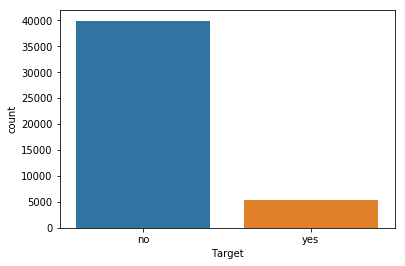

In [259]:
sns.countplot(x = 'Target', data = term_df)

In [260]:
term_df[term_df['Target'] == 'no'].shape[0]

39922

In [261]:
term_df[term_df['Target'] == 'yes'].shape[0]

5289

- The dataset is clearly skewed towards the customers who didnot go for term deposits i.e., NO

In [ ]:
#Countplot for the previous outcome
sns.countplot(x = 'poutcome', data = term_df, hue = 'Target')

In [ ]:
term_df[term_df['poutcome'] == 'success'].shape[0]

The success after the present campaign is more than the previous one 

In [ ]:
#Countplot for the defaulters 
sns.countplot(x = 'default', data = term_df, hue = 'Target')

- Dataset is more skewed towards the customers who are not defaulters

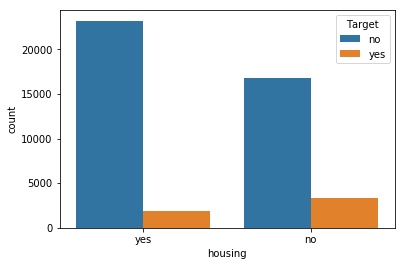

In [205]:
sns.countplot(x = 'housing', data = term_df, hue = 'Target')

The number of persons having homeloan and not having homeloan is almost equal

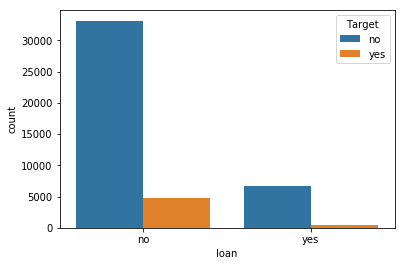

In [206]:
sns.countplot(x = 'loan', data = term_df, hue = 'Target')

- Dataset is skewed towards customers who donot have any personal loan

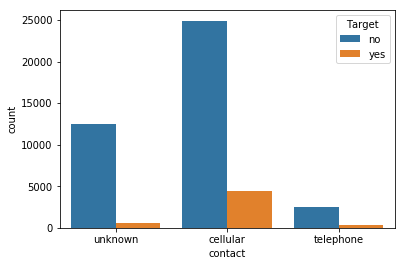

In [207]:
sns.countplot(x = 'contact', data = term_df, hue = 'Target')

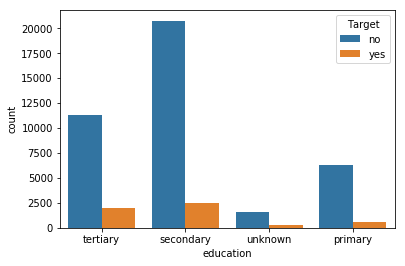

In [208]:
sns.countplot(x = 'education', data = term_df, hue = 'Target')

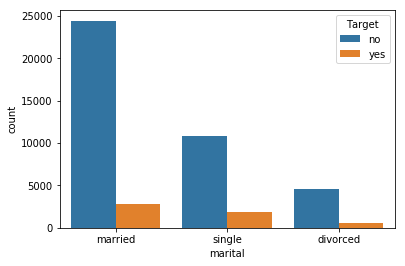

In [209]:
sns.countplot(x = 'marital', data = term_df, hue = 'Target')

- Maximum customers of bank in the dataset are married

In [291]:
# Copy the dataset into an another dataframe so that the original dataset is not lost
td_df = term_df.copy(deep = True)

In [292]:
# Many algorithms in Python can take only numerical / categorical colums. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in td_df: # Loop through all columns in the dataframe
    if td_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        td_df[feature] = pd.Categorical(td_df[feature]).codes # Replace strings with an integer

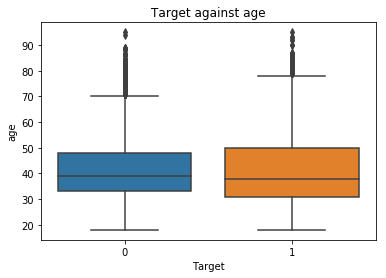

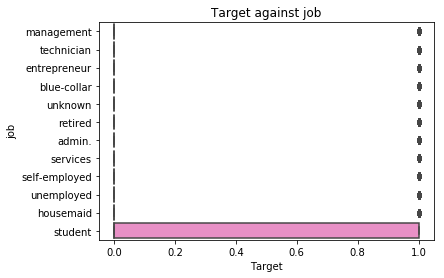

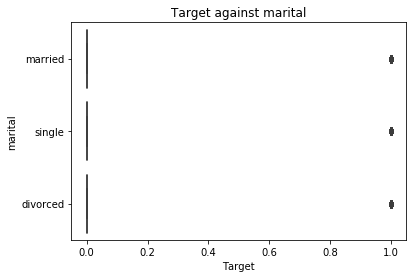

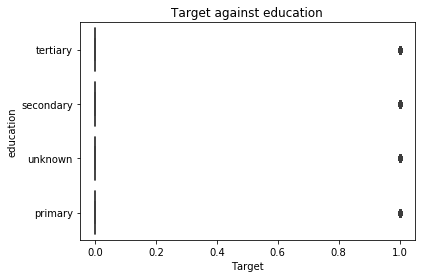

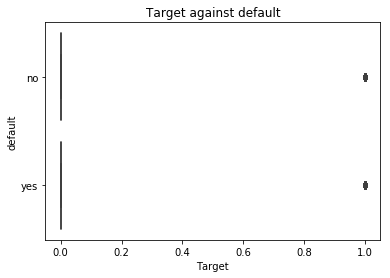

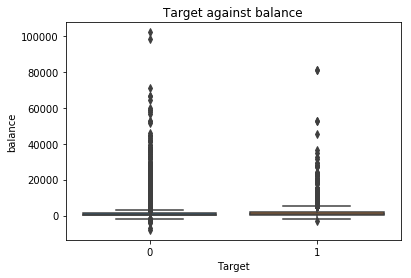

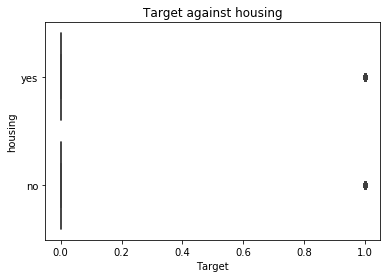

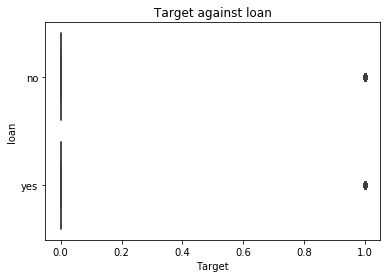

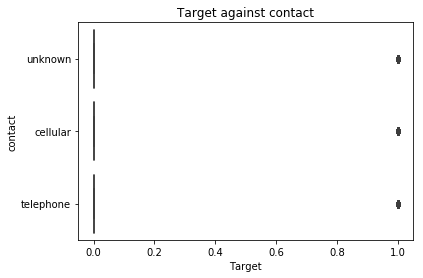

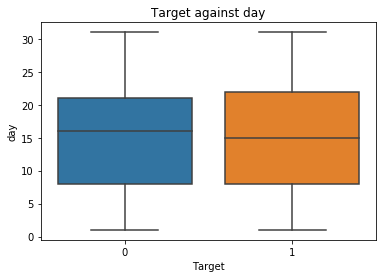

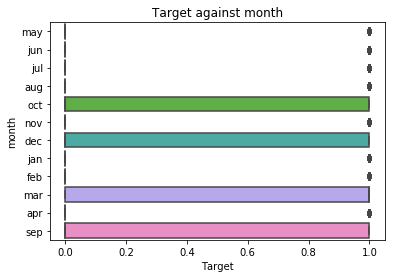

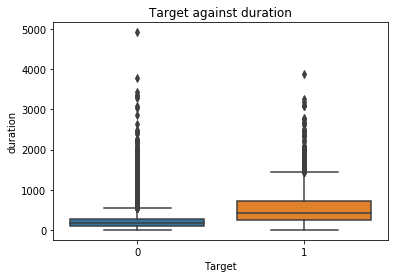

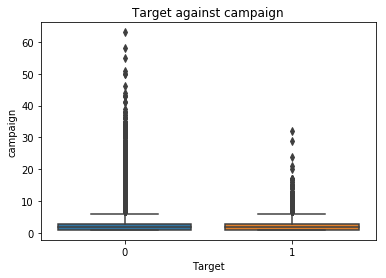

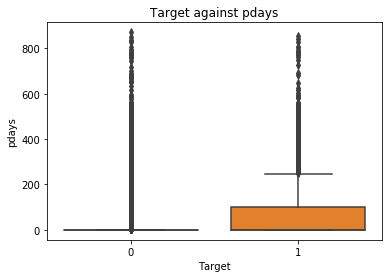

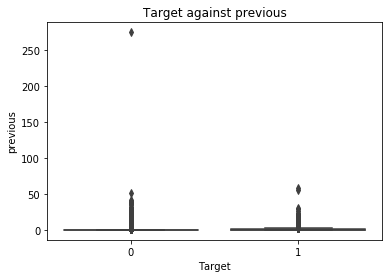

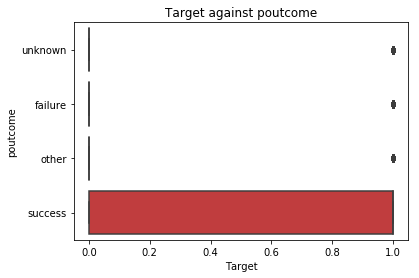

In [212]:
col = td_df.columns[:16]
for item in col:
    
    plt.title('Target' + ' against ' +  str(item))
    sns.boxplot(x = td_df.Target, y = term_df[item], data = td_df)
    plt.show()

In [293]:
td_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [430]:
# Many algorithms in Python can take only numerical / categorical colums. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in td_df: # Loop through all columns in the dataframe
    if td_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        td_df[feature] = pd.Categorical(td_df[feature]).codes # Replace strings with an integer

In [431]:
td_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [432]:
td_df.describe(include = 'all').transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


age             AxesSubplot(0.125,0.749828;0.168478x0.130172)
job          AxesSubplot(0.327174,0.749828;0.168478x0.130172)
marital      AxesSubplot(0.529348,0.749828;0.168478x0.130172)
education    AxesSubplot(0.731522,0.749828;0.168478x0.130172)
default         AxesSubplot(0.125,0.593621;0.168478x0.130172)
balance      AxesSubplot(0.327174,0.593621;0.168478x0.130172)
housing      AxesSubplot(0.529348,0.593621;0.168478x0.130172)
loan         AxesSubplot(0.731522,0.593621;0.168478x0.130172)
contact         AxesSubplot(0.125,0.437414;0.168478x0.130172)
day          AxesSubplot(0.327174,0.437414;0.168478x0.130172)
month        AxesSubplot(0.529348,0.437414;0.168478x0.130172)
duration     AxesSubplot(0.731522,0.437414;0.168478x0.130172)
campaign        AxesSubplot(0.125,0.281207;0.168478x0.130172)
pdays        AxesSubplot(0.327174,0.281207;0.168478x0.130172)
previous     AxesSubplot(0.529348,0.281207;0.168478x0.130172)
poutcome     AxesSubplot(0.731522,0.281207;0.168478x0.130172)
Target  

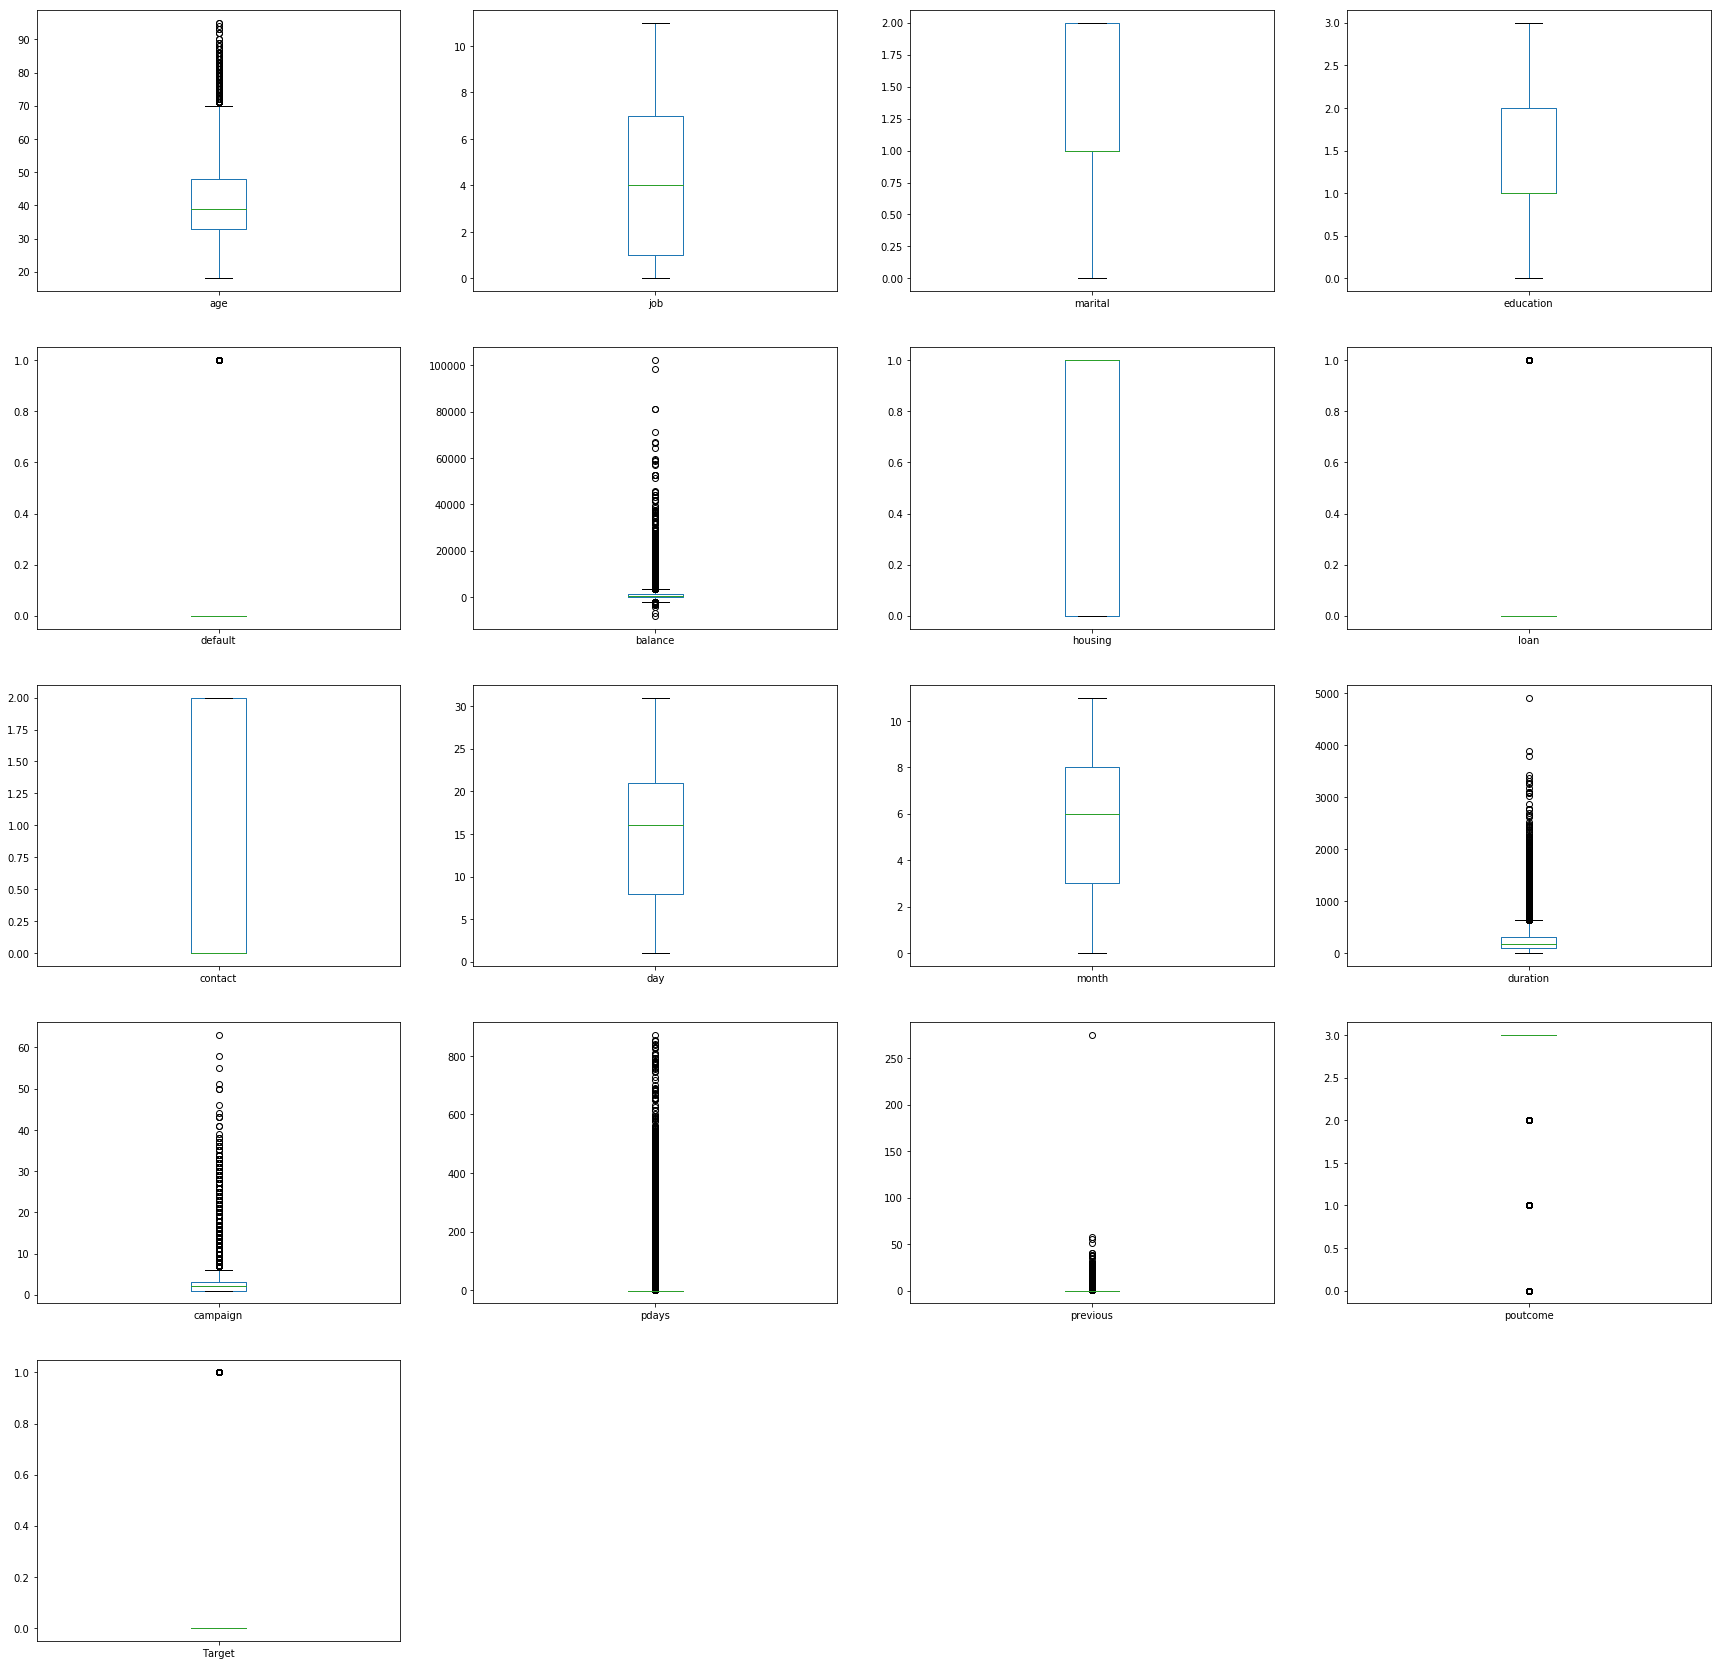

In [433]:
# boxplot for the term deposit data
td_df.plot(kind = 'box',figsize = (30,30),subplots = True, layout = (5,4))

In [434]:
#For processing of data
from sklearn import preprocessing

In [435]:
# Normalising of data
x_array = np.array(td_df['age'])
norm_age = preprocessing.normalize([x_array])

x_array1 = np.array(td_df['job'])
#norm_job = preprocessing.normalize([x_array1])

x_array2 = np.array(td_df['marital'])
#norm_marital = preprocessing.normalize([x_array2])

x_array3 = np.array(td_df['education'])
#norm_education = preprocessing.normalize([x_array3])

x_array4 = np.array(td_df['default'])
#norm_default = preprocessing.normalize([x_array4])

x_array5 = np.array(td_df['balance'])
norm_balance = preprocessing.normalize([x_array5])

x_array6 = np.array(td_df['housing'])
#norm_housing = preprocessing.normalize([x_array6])

x_array7 = np.array(td_df['loan'])
#norm_loan = preprocessing.normalize([x_array7])

x_array8 = np.array(td_df['contact'])
#norm_contact = preprocessing.normalize([x_array8])

x_array9 = np.array(td_df['day'])
#norm_day = preprocessing.normalize([x_array9])

x_array10 = np.array(td_df['month'])
#norm_month = preprocessing.normalize([x_array10])

x_array11 = np.array(td_df['duration'])
norm_duration = preprocessing.normalize([x_array11])

x_array12 = np.array(td_df['campaign'])
norm_campaign = preprocessing.normalize([x_array12])

x_array13 = np.array(td_df['pdays'])
norm_pdays = preprocessing.normalize([x_array13])

x_array14 = np.array(td_df['previous'])
norm_previous = preprocessing.normalize([x_array14])

x_array15 = np.array(td_df['poutcome'])
norm_poutcome = preprocessing.normalize([x_array15])
# Target variable

x_array16 = np.array(td_df['Target'])
norm_Target = preprocessing.normalize([x_array16])



In [436]:
td_df_norm = pd.DataFrame({'age':norm_age[0,:], 'job':x_array1, 'marital':x_array2, 'education':x_array3,
                           'default':x_array4, 'balance':norm_balance[0,:], 'housing':x_array6,
                           'loan':x_array7,'contact':x_array8, 'day':x_array9, 'month':x_array10, 
                           'duration':norm_duration[0,:], 'campaign':norm_campaign[0,:], 'pdays':norm_pdays[0,:], 'previous':norm_previous[0,:], 
                           'poutcome':x_array15, 'Target':x_array16
                          })
td_df_norm.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,0.006450,4,1,2,0,0.003022,1,0,2,5,8,0.003366,0.001133,-0.000044,0.0,3,0
1,0.004893,9,2,1,0,0.000041,1,0,2,5,8,0.001948,0.001133,-0.000044,0.0,3,0
2,0.003670,2,1,1,0,0.000003,1,1,2,5,8,0.000980,0.001133,-0.000044,0.0,3,0
3,0.005227,1,1,3,0,0.002123,1,0,2,5,8,0.001187,0.001133,-0.000044,0.0,3,0
4,0.003670,11,2,3,0,0.000001,0,0,2,5,8,0.002554,0.001133,-0.000044,0.0,3,0


In [437]:
td_df_norm.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,0.005672,9,1,2,0,0.001163,0,0,0,17,9,0.012601,0.003398,-0.000044,0.000000,3,1
45207,0.007896,5,0,0,0,0.002438,0,0,0,17,9,0.005881,0.002266,-0.000044,0.000000,3,1
45208,0.008007,5,1,1,0,0.008058,0,0,0,17,9,0.014535,0.005664,0.008020,0.005940,2,1
45209,0.006339,1,1,1,0,0.000942,0,0,1,17,9,0.006552,0.004531,-0.000044,0.000000,3,0
45210,0.004115,2,1,1,0,0.004189,0,0,0,17,9,0.004656,0.002266,0.008195,0.021779,1,0


In [438]:
td_df_norm.describe(include = 'all').transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,0.004552,0.001181,0.002002,0.003670,0.004337,0.005338,0.010565
job,45211.0,4.339762,3.272657,0.000000,1.000000,4.000000,7.000000,11.000000
marital,45211.0,1.167725,0.608230,0.000000,1.000000,1.000000,2.000000,2.000000
education,45211.0,1.224813,0.747997,0.000000,1.000000,1.000000,2.000000,3.000000
default,45211.0,0.018027,0.133049,0.000000,0.000000,0.000000,0.000000,1.000000
balance,45211.0,0.001921,0.004293,-0.011306,0.000102,0.000632,0.002013,0.143994
housing,45211.0,0.555838,0.496878,0.000000,0.000000,1.000000,1.000000,1.000000
loan,45211.0,0.160226,0.366820,0.000000,0.000000,0.000000,0.000000,1.000000
contact,45211.0,0.640242,0.897951,0.000000,0.000000,0.000000,2.000000,2.000000
day,45211.0,15.806419,8.322476,1.000000,8.000000,16.000000,21.000000,31.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0E0A08FD0>,
      dtype=object)

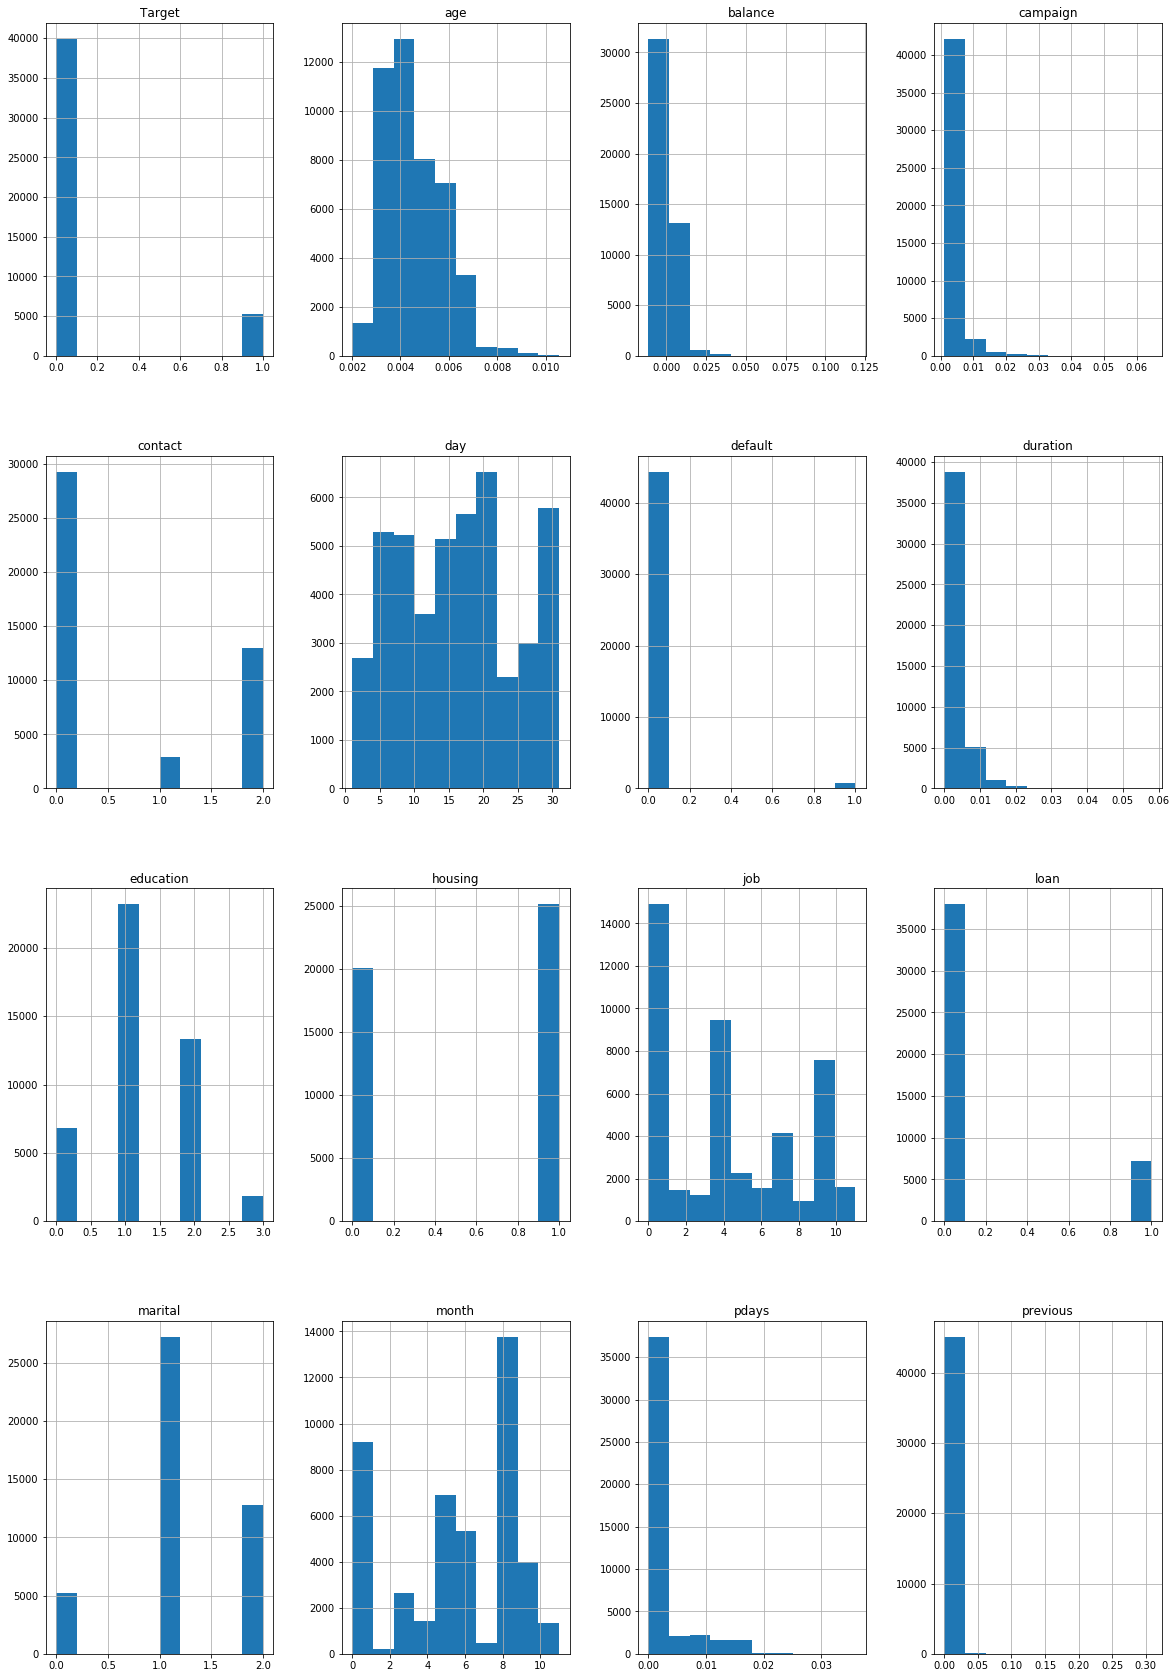

In [278]:
#Histogram plots after normalization
td_df_norm.hist(figsize = (20,30))

# Transformation of skewed data

In [439]:
#Log Transformation of Right skewed independent variables

balance_trans = np.log(td_df_norm['balance']+1)
td_df_norm['balance'] = balance_trans

campaign_trans = np.log(td_df_norm['campaign']+1)
td_df_norm['campaign'] = campaign_trans

duration_trans = np.log(td_df_norm['duration']+1)
td_df_norm['duration'] = duration_trans

pdays_trans = np.log(td_df_norm['pdays']+1)
td_df_norm['pdays'] = pdays_trans

previous_trans= np.log(td_df_norm['previous']+1)
td_df_norm['previous'] = previous_trans



# Density plot of transformed skewed data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0E2934860>,
      dtype=object)

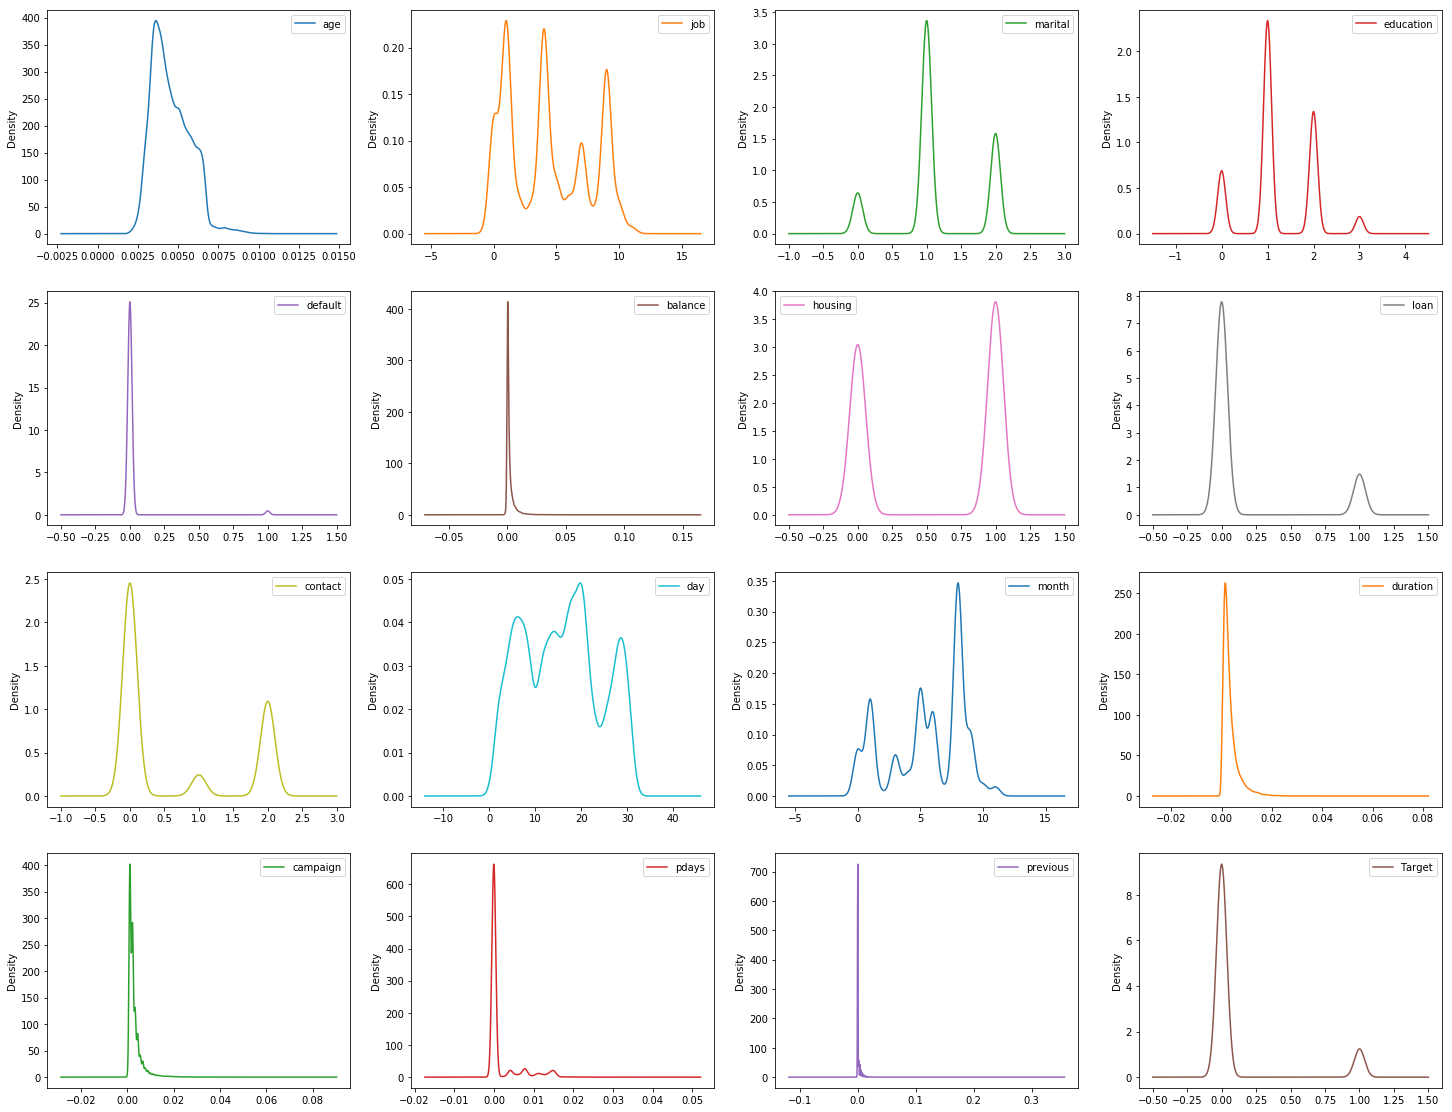

In [282]:
td_df_norm.plot(kind = 'kde', subplots = True, sharex = False, sharey = False, layout = (5,4), figsize = (25,25))

In [303]:
td_df_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,0.004552,0.001181,0.002002,0.003670,0.004337,0.005338,0.010565
job,45211.0,4.339762,3.272657,0.000000,1.000000,4.000000,7.000000,11.000000
marital,45211.0,1.167725,0.608230,0.000000,1.000000,1.000000,2.000000,2.000000
education,45211.0,1.224813,0.747997,0.000000,1.000000,1.000000,2.000000,3.000000
default,45211.0,0.018027,0.133049,0.000000,0.000000,0.000000,0.000000,1.000000
balance,45211.0,0.001910,0.004212,-0.011371,0.000102,0.000631,0.002011,0.134526
housing,45211.0,0.555838,0.496878,0.000000,0.000000,1.000000,1.000000,1.000000
loan,45211.0,0.160226,0.366820,0.000000,0.000000,0.000000,0.000000,1.000000
contact,45211.0,0.640242,0.897951,0.000000,0.000000,0.000000,2.000000,2.000000
day,45211.0,15.806419,8.322476,1.000000,8.000000,16.000000,21.000000,31.000000


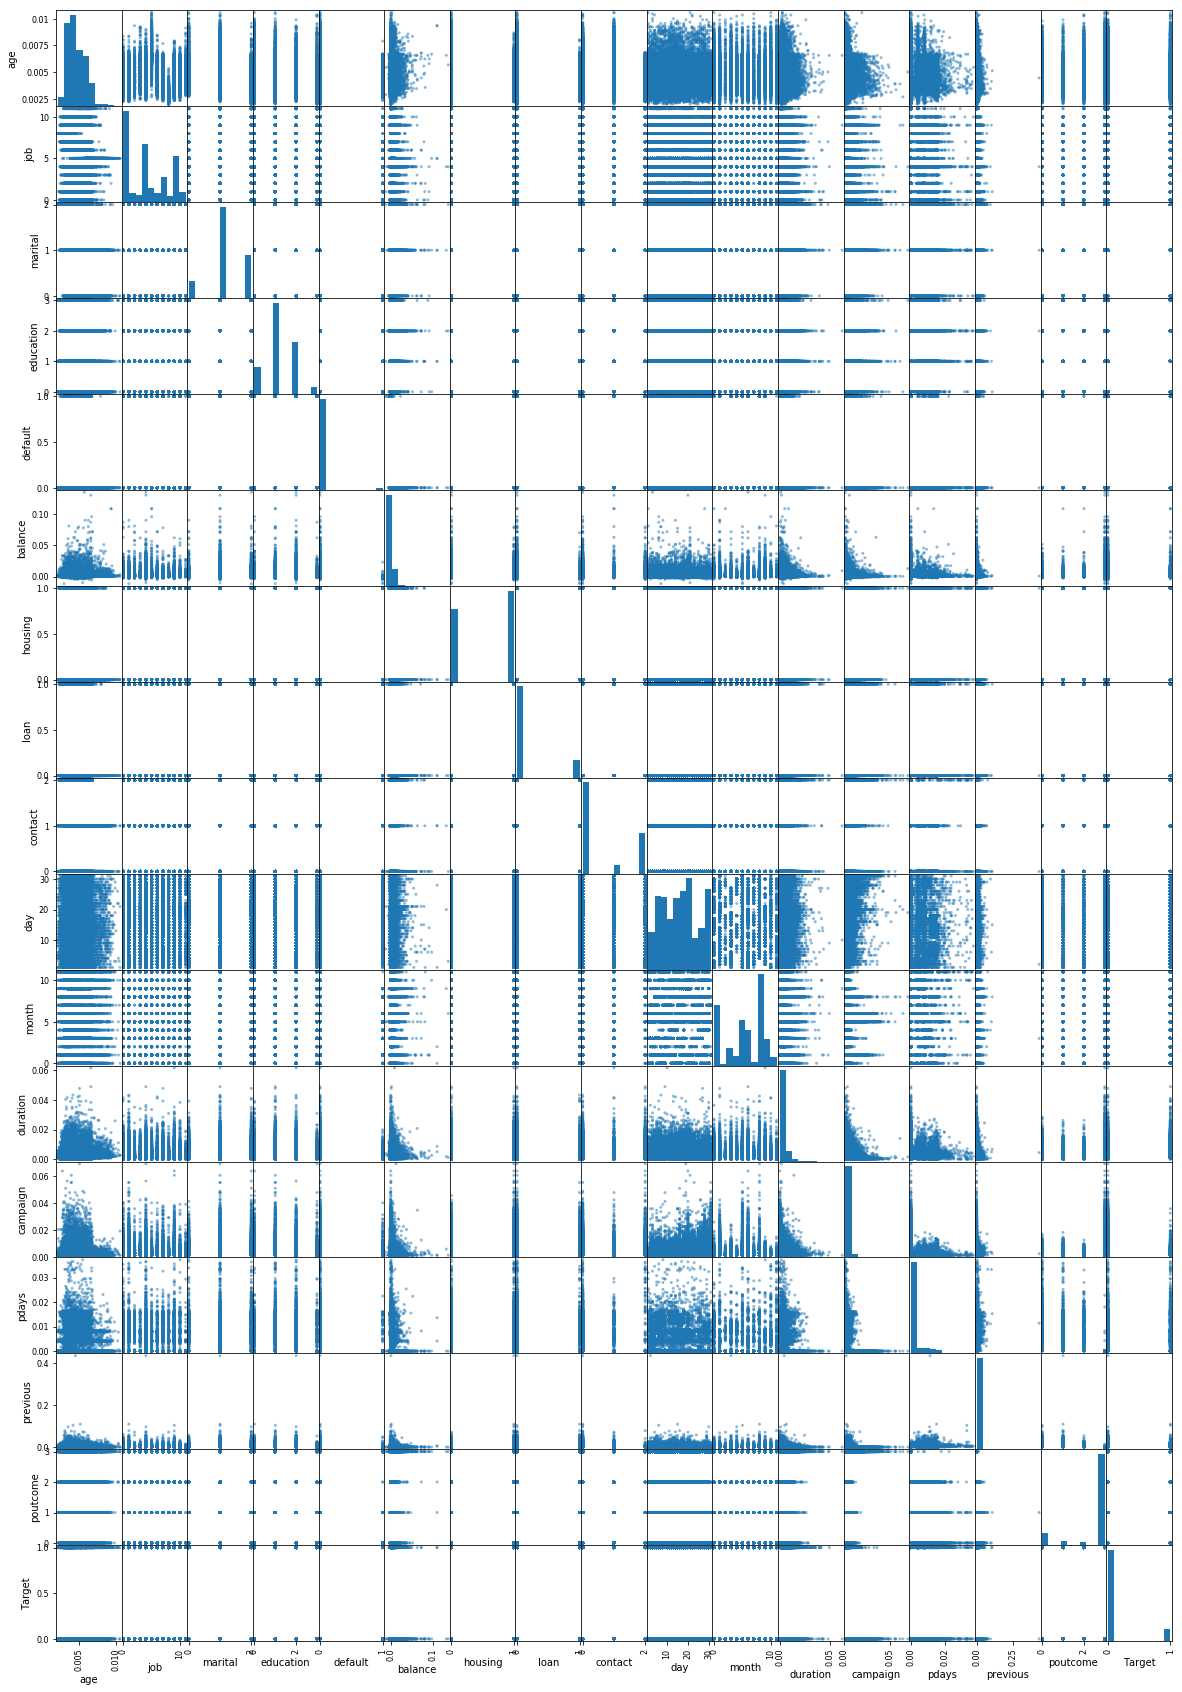

In [440]:
#To view how the variables are scattered around each other lets draw a scatter matrix
from pandas.plotting import scatter_matrix
p = scatter_matrix(td_df_norm, figsize = (20,30))

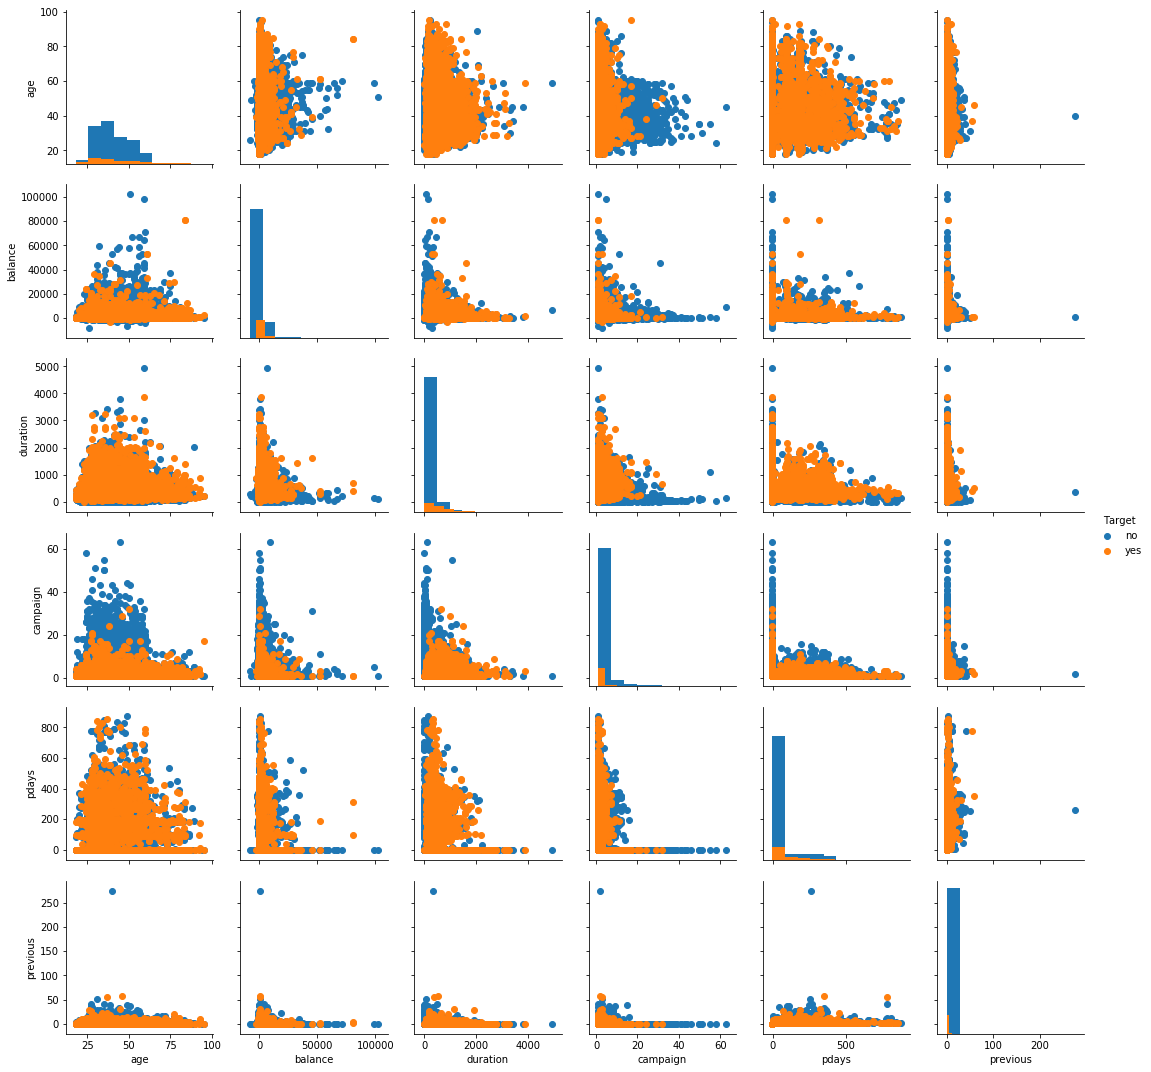

In [ ]:
#Plotting pair plots for continous variables against the Target variable
g = sns.PairGrid(term_df, vars = ['age','balance','duration','campaign','pdays','previous'], hue = 'Target')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

- There is one leverage point in the dataset which drags the model towards it as can be depicted in this pair panel.  It 
  can be seen that the parameter belongs to the class of NO that stands out in the pair panel

In [304]:
#creating co-relation matrix
plt.figure(figsize = (20,30))
corr = td_df_norm.corr()

<Figure size 1440x2160 with 0 Axes>

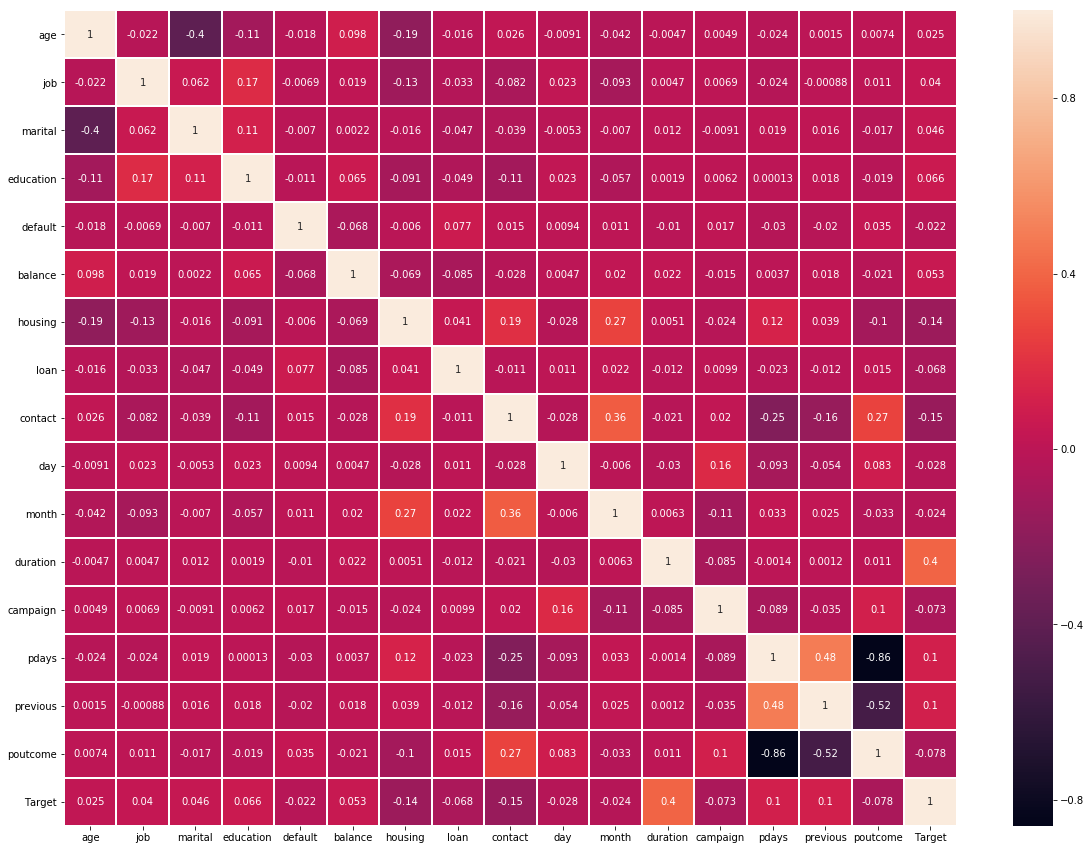

In [305]:
#Heat map of correlation data
plt.figure(figsize = (20,15))
sns.heatmap(corr,annot = True, linewidths = 1)

poutcome and pdays have a very strong negative co-relation of -0.86.  Hence it is better to take only one variable.
lets take pdays only instead of both poutcome and pdays as pdays is a continous variable.

In [306]:
#Dropping a column basing on correlation co-efficient
col = ['poutcome']
td_df_norm.drop(col,axis = 1, inplace = True)




In [307]:
td_df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null float64
job          45211 non-null int8
marital      45211 non-null int8
education    45211 non-null int8
default      45211 non-null int8
balance      45211 non-null float64
housing      45211 non-null int8
loan         45211 non-null int8
contact      45211 non-null int8
day          45211 non-null int64
month        45211 non-null int8
duration     45211 non-null float64
campaign     45211 non-null float64
pdays        45211 non-null float64
previous     45211 non-null float64
Target       45211 non-null int8
dtypes: float64(6), int64(1), int8(9)
memory usage: 2.8 MB


In [308]:
#To split the data into train and test data set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

#To check the accuracy of the model
from sklearn.metrics import accuracy_score

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# for prepartation of classification report
from sklearn.metrics import classification_report,make_scorer

# for drawing roc and aoc curves
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,auc

# for ensemble techniques
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Data Slicing and Standardisation

In [309]:
X_features = td_df_norm.iloc[:,:15]
y = td_df_norm.iloc[:,15]

In [310]:
# Standardization

from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X_features)

X = pd.DataFrame(data = rescaledX, columns= X_features.columns)
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.262826,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.012725,-0.572988,-0.41198,-0.268498
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.443731,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416903,-0.572988,-0.41198,-0.268498
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.452769,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.710179,-0.572988,-0.41198,-0.268498
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.050144,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.647590,-0.572988,-0.41198,-0.268498
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.453103,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233260,-0.572988,-0.41198,-0.268498


In [311]:
#To split the data into train and test set
seed = 1000
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = seed)

# Training and KFold validation of the classification algorithms

In [312]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC


In [313]:
# Defining Confusion Matrix
def confusion(x,y):
    cm = confusion_matrix(x,y)
    f, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax=ax)
    plt.title("Confusion Matrix", fontsize=20)
    plt.subplots_adjust(left=0.1, right=0.5, bottom=0.11, top=0.5)
    ax.set_yticks(np.arange(cm.shape[0]) + 0.5, minor=False)
    ax.set_xticklabels("")
    ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=10, rotation=360)
    plt.show()

In [314]:
# Defining ROC-AUC Curve
def rocauc (x,y):
    fpr, tpr,_=roc_curve(x,y,drop_intermediate=False)
    plt.figure()
    ##Adding the ROC
    plt.plot(fpr, tpr, color='red',
    lw=2, label='ROC curve')
    ##Random FPR and TPR
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    ##Title and label
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()
    plt.show()
    area = roc_auc_score(x,y)
    return area
    
    
    

In [315]:
# Initiating Models
clfLR = LogisticRegression(random_state = seed, class_weight = None)
clfNB = GaussianNB()
clfKNN = KNeighborsClassifier()
clfDT = DecisionTreeClassifier(random_state = seed, class_weight = None)
clfSVC = SVC(random_state = seed, class_weight = None)
clfRF = RandomForestClassifier(n_estimators = 18)
clfGB = GradientBoostingClassifier()

In [316]:
# Creating the matrix of models 
Models = []
Models.append(('Logistci Regression', clfLR))
Models.append(('Naive Bayes', clfNB))
Models.append(('K-Nearest Neighbour',clfKNN))
Models.append(('Decision Tree', clfDT))
Models.append(('Support Vector Classifier', clfSVC))
Models.append(('Random Forest',clfRF))
Models.append(('Gradeint Boosting', clfGB))

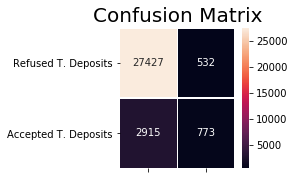

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27959
           1       0.59      0.21      0.31      3688

   micro avg       0.89      0.89      0.89     31647
   macro avg       0.75      0.60      0.63     31647
weighted avg       0.87      0.89      0.87     31647

Logistci Regression:Mean of cross validation accuracy 0.891080
ROC-AUC curve for the "Logistci Regression" algorithm


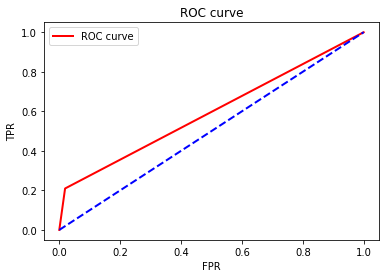

area under the curve is : 0.595
****************************************************************************************************


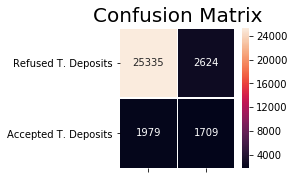

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     27959
           1       0.39      0.46      0.43      3688

   micro avg       0.85      0.85      0.85     31647
   macro avg       0.66      0.68      0.67     31647
weighted avg       0.87      0.85      0.86     31647

Naive Bayes:Mean of cross validation accuracy 0.854552
ROC-AUC curve for the "Naive Bayes" algorithm


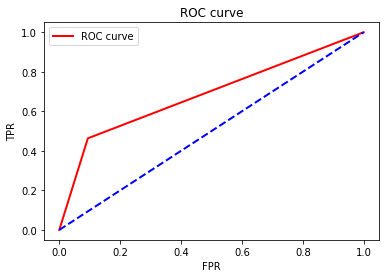

area under the curve is : 0.685
****************************************************************************************************


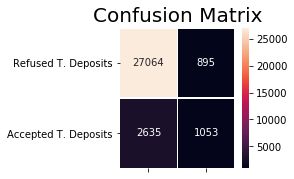

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     27959
           1       0.54      0.29      0.37      3688

   micro avg       0.89      0.89      0.89     31647
   macro avg       0.73      0.63      0.66     31647
weighted avg       0.87      0.89      0.87     31647

K-Nearest Neighbour:Mean of cross validation accuracy 0.888457
ROC-AUC curve for the "K-Nearest Neighbour" algorithm


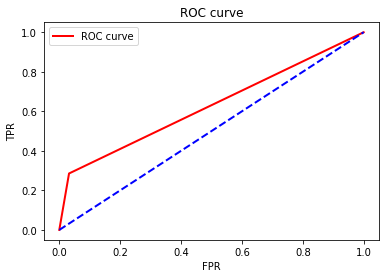

area under the curve is : 0.627
****************************************************************************************************


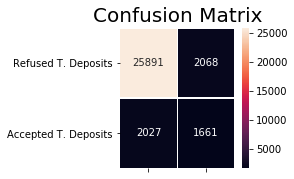

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27959
           1       0.45      0.45      0.45      3688

   micro avg       0.87      0.87      0.87     31647
   macro avg       0.69      0.69      0.69     31647
weighted avg       0.87      0.87      0.87     31647

Decision Tree:Mean of cross validation accuracy 0.870604
ROC-AUC curve for the "Decision Tree" algorithm


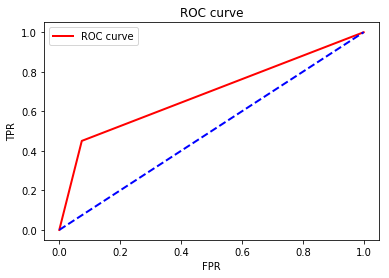

area under the curve is : 0.688
****************************************************************************************************


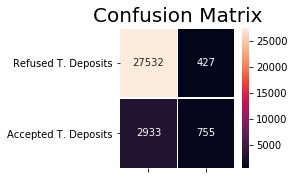

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27959
           1       0.64      0.20      0.31      3688

   micro avg       0.89      0.89      0.89     31647
   macro avg       0.77      0.59      0.63     31647
weighted avg       0.87      0.89      0.87     31647

Support Vector Classifier:Mean of cross validation accuracy 0.893829
ROC-AUC curve for the "Support Vector Classifier" algorithm


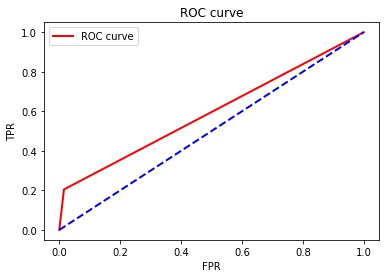

area under the curve is : 0.595
****************************************************************************************************


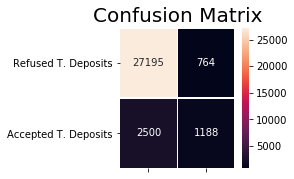

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     27959
           1       0.61      0.32      0.42      3688

   micro avg       0.90      0.90      0.90     31647
   macro avg       0.76      0.65      0.68     31647
weighted avg       0.88      0.90      0.88     31647

Random Forest:Mean of cross validation accuracy 0.895851
ROC-AUC curve for the "Random Forest" algorithm


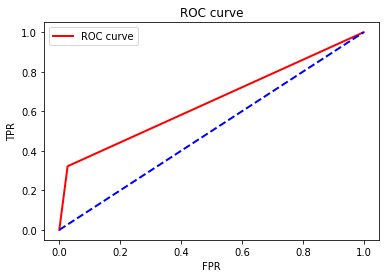

area under the curve is : 0.647
****************************************************************************************************


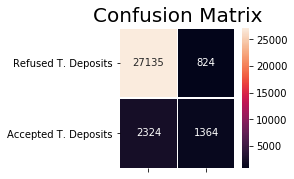

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     27959
           1       0.62      0.37      0.46      3688

   micro avg       0.90      0.90      0.90     31647
   macro avg       0.77      0.67      0.70     31647
weighted avg       0.89      0.90      0.89     31647

Gradeint Boosting:Mean of cross validation accuracy 0.900496
ROC-AUC curve for the "Gradeint Boosting" algorithm


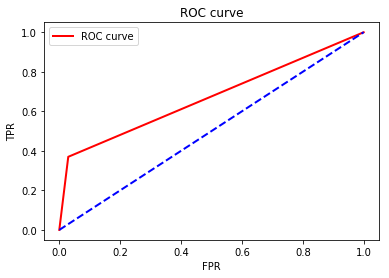

area under the curve is : 0.670
****************************************************************************************************


In [317]:
#Training and Cross validation of different models with confusion matrix, classification report and AUC of ROC-AUC curve
results = []
names = []
mean_score = []
AUC = []
rocauc_score = []
#initialising the kfold value for Logistic Regression
for name,model in Models:
        
    kfold = KFold(n_splits=5, shuffle=True, random_state = seed)
    cv_results = cross_val_score(model,X_train, y_train,cv = kfold,   scoring = 'accuracy')
    cv_predict_train = cross_val_predict(model,X_train,y_train,cv = kfold)
    confusion(y_train,cv_predict_train)
    cr = classification_report(y_train, cv_predict_train)
    print(cr)
    results.append(cv_results)
    names.append(name)
    mean_score.append(cv_results.mean())
    msg = "%s:Mean of cross validation accuracy %f" % (name,cv_results.mean())
    print(msg)
    print('ROC-AUC curve for the "%s" algorithm' %name)
    rocauc(y_train,cv_predict_train)
    area = roc_auc_score(y_train,cv_predict_train)
    AUC.append(area)
    print('area under the curve is : %.3f' %area)
    print('*'*100)
   

     
    



    
    
    
    

   
   
    

In [318]:
#Defining dataframe of classifiers with respective cross validation score mean and AUC of ROC-AUC curve
dtrain = {'Classifiers': ['Logistic Regession', 'Naive Bayes', 'K Nearest Neighbor', 'Decision Tree', 'Support Vector Classifier',
                    'Random Forest', 'Gradient Boosting'],
                     'Cross Val Mean Score' : np.array(mean_score),
                     'Area Under ROC Curve' : np.array(AUC)
         }
Classifier_train = pd.DataFrame(data = dtrain)
Classifier_train

    

,Classifiers,Cross Val Mean Score,Area Under ROC Curve
0,Logistic Regession,0.891080,0.595285
1,Naive Bayes,0.854552,0.684772
2,K Nearest Neighbor,0.888457,0.626755
3,Decision Tree,0.870604,0.688207
4,Support Vector Classifier,0.893829,0.594723
5,Random Forest,0.895851,0.647400
6,Gradient Boosting,0.900496,0.670188


In [319]:
Models

[('Logistci Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=1000, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('K-Nearest Neighbour',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
              splitter='best')),
 ('Support Vector Classifier',
  SVC(C=1.0, cache_size

In [320]:
# Displaying models in the ascending order of their mean scores in cross validation
Classifier_train = Classifier_train.sort_values(by=['Cross Val Mean Score'], ascending=False)
Classifier_train

,Classifiers,Cross Val Mean Score,Area Under ROC Curve
6,Gradient Boosting,0.900496,0.670188
5,Random Forest,0.895851,0.647400
4,Support Vector Classifier,0.893829,0.594723
0,Logistic Regession,0.891080,0.595285
2,K Nearest Neighbor,0.888457,0.626755
3,Decision Tree,0.870604,0.688207
1,Naive Bayes,0.854552,0.684772


- Gradient boosting does well in terms of 'Cross Validation accuracy' and 'Decision Tree' does well in 'Area Under ROC Curve' parameter

# Testing the Algorithms

In [364]:
# Testing the models
Models = []
Models.append(('Logistic Regression', clfLR))
Models.append(('Naive Bayes', clfNB))
Models.append(('K-Nearest Neighbour',clfKNN))
Models.append(('Decision Tree', clfDT))
Models.append(('Support Vector Classifier', clfSVC))
Models.append(('Random Forest',clfRF))
Models.append(('Gradeint Boosting', clfGB))

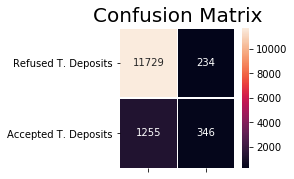

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11963
           1       0.60      0.22      0.32      1601

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



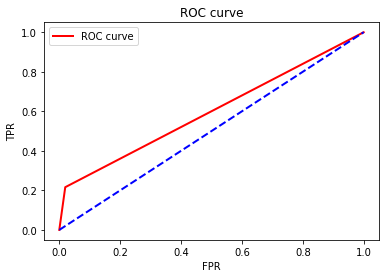

Area under ROC-AUC is 0.598
Logistic Regression : Test Score is 0.89
****************************************************************************************************


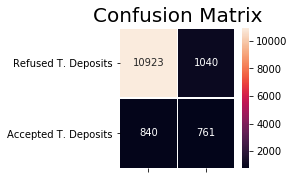

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     11963
           1       0.42      0.48      0.45      1601

   micro avg       0.86      0.86      0.86     13564
   macro avg       0.68      0.69      0.68     13564
weighted avg       0.87      0.86      0.86     13564



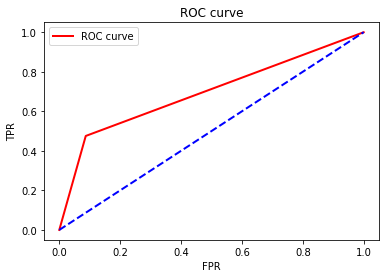

Area under ROC-AUC is 0.694
Naive Bayes : Test Score is 0.86
****************************************************************************************************


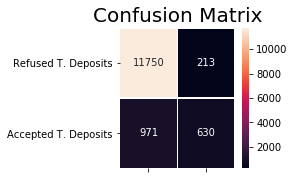

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11963
           1       0.75      0.39      0.52      1601

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.84      0.69      0.73     13564
weighted avg       0.90      0.91      0.90     13564



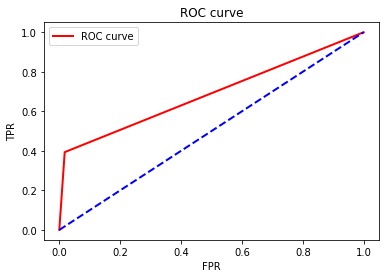

Area under ROC-AUC is 0.688
K-Nearest Neighbour : Test Score is 0.91
****************************************************************************************************


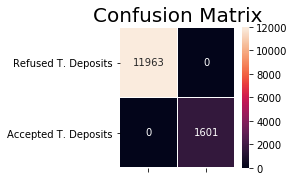

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11963
           1       1.00      1.00      1.00      1601

   micro avg       1.00      1.00      1.00     13564
   macro avg       1.00      1.00      1.00     13564
weighted avg       1.00      1.00      1.00     13564



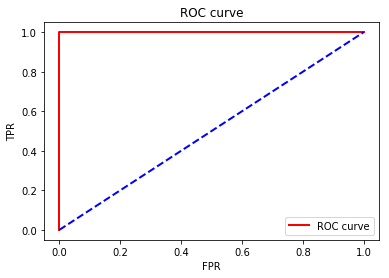

Area under ROC-AUC is 1.000
Decision Tree : Test Score is 1.00
****************************************************************************************************


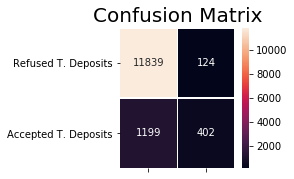

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11963
           1       0.76      0.25      0.38      1601

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.84      0.62      0.66     13564
weighted avg       0.89      0.90      0.88     13564



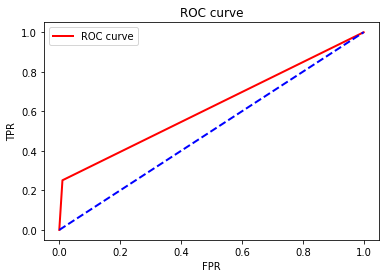

Area under ROC-AUC is 0.620
Support Vector Classifier : Test Score is 0.90
****************************************************************************************************


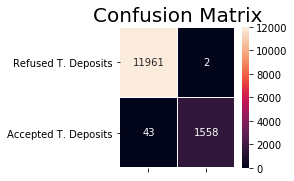

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11963
           1       1.00      0.97      0.99      1601

   micro avg       1.00      1.00      1.00     13564
   macro avg       1.00      0.99      0.99     13564
weighted avg       1.00      1.00      1.00     13564



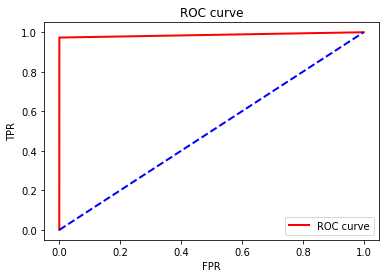

Area under ROC-AUC is 0.986
Random Forest : Test Score is 1.00
****************************************************************************************************


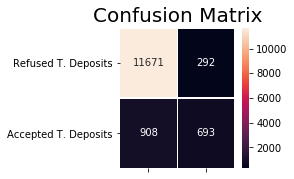

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     11963
           1       0.70      0.43      0.54      1601

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.82      0.70      0.74     13564
weighted avg       0.90      0.91      0.90     13564



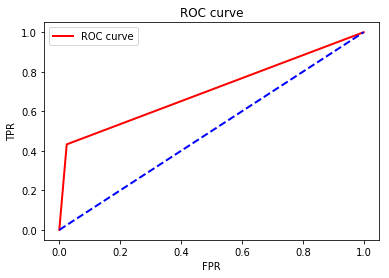

Area under ROC-AUC is 0.704
Gradeint Boosting : Test Score is 0.91
****************************************************************************************************


In [367]:
#Fitting the models trained, testing, their confusion matrix, classification report
names = []
score_test = []
for name,model in Models :
    model.fit(X_test,y_test)
    y_predict_test = model.predict(X_test)
    confusion(y_test,y_predict_test)
    test_score = model.score(X_test,y_test)
    score_test.append(test_score)
    cr = classification_report(y_test,y_predict_test)
    print(cr)
    rocauc(y_test,y_predict_test)
    area = roc_auc_score(y_test,y_predict_test)
    print('Area under ROC-AUC is %.3f' %area)
    msg = "%s : Test Score is %.2f" %(name,test_score)
    print(msg)
    print('*' *100)

    

In [324]:
#Defining data frame of Models and their test scores
dtest = {'Classifiers': ['Logistic Regession', 'Naive Bayes', 'K Nearest Neighbor', 'Decision Tree', 'Support Vector Classifier',
                    'Random Forest', 'Gradient Boosting'],
                     'Test Score' : np.array(score_test)
         }

Classifier_test = pd.DataFrame(data = dtest)


In [325]:
#Defining dataset for test score and displaying in the order of test score
Classifier_test = Classifier_test.sort_values(by=['Test Score'], ascending=False)
Classifier_test

,Classifiers,Test Score
3,Decision Tree,1.000000
5,Random Forest,0.997198
2,K Nearest Neighbor,0.912710
6,Gradient Boosting,0.911531
4,Support Vector Classifier,0.902462
0,Logistic Regession,0.890224
1,Naive Bayes,0.861398


In [326]:
# Comparison of models basing on their training and testing scores
d = {'Classifiers': ['Logistic Regession', 'Naive Bayes', 'K Nearest Neighbor', 'Decision Tree', 'Support Vector Classifier',
                    'Random Forest', 'Gradient Boosting'], 'Training scrore' : Classifier_train['Cross Val Mean Score'],
                    'Testing Score' : Classifier_test['Test Score']
    }
    

In [327]:
train_test_score = pd.DataFrame(data = d)
train_test_score

,Classifiers,Training scrore,Testing Score
0,Logistic Regession,0.891080,0.890224
1,Naive Bayes,0.854552,0.861398
2,K Nearest Neighbor,0.888457,0.912710
3,Decision Tree,0.870604,1.000000
4,Support Vector Classifier,0.893829,0.902462
5,Random Forest,0.895851,0.997198
6,Gradient Boosting,0.900496,0.911531


- It can be clearly seen that the Decision Tree and the RandomForest algorithms try to overfit data in testing stage.  Gradient boosting
does well in terms of matching scores in training and testing phase and also in 'Area under ROC Curve' parameter as seen earlier

# GRID SEARCH

In [328]:
#import gridsearch from sklearn
from sklearn.model_selection import GridSearchCV

LOGISTIC REGRESSION

In [329]:
#Initial Logistic Tree Classifier
clfLR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1000, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

- Initial hyper parameter value used in grid search in default value of C i.e., 1.0

In [330]:
param_grid =  { 
               'C' : [0.01,0.1,1,10,100]
             }

In [331]:
grid_search_LR = GridSearchCV(estimator = clfLR, param_grid = param_grid, scoring = None, cv = 3, n_jobs = -1, verbose = 3)

In [332]:
grid_search_LR.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1000, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=3)

In [333]:
grid_search_LR.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1000, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [334]:
grid_search_LR.best_score_

0.8907321389073214

In [335]:
y_predict_gs_LR = grid_search_LR.predict(X_test)

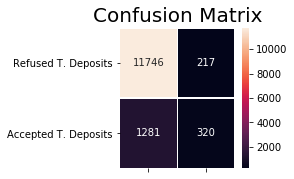

In [336]:
confusion(y_test,y_predict_gs_LR)

In [337]:
print(classification_report(y_test,y_predict_gs_LR))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11963
           1       0.60      0.20      0.30      1601

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.75      0.59      0.62     13564
weighted avg       0.87      0.89      0.86     13564



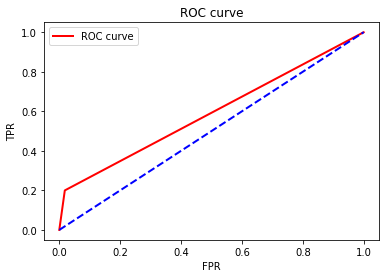

Area Under the ROC Curve is 0.6702


In [338]:
rocauc(y_test,y_predict_gs_LR)
print('Area Under the ROC Curve is %.4f' % area)

- The Area Under the ROC curve is improved from 0.598 to 0.6702 after fitting the best fit model obtained by doing grid search
  on the hyperparameter

DECISION TREE CLASSIFIER

In [339]:
# Initial Decision Tree Classifier
clfDT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
            splitter='best')

In [340]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,4,10,20],
    'min_samples_leaf': [1,5,10,20],
    'max_depth': [2,5,10,20]
    
}

In [341]:
grid_search = GridSearchCV(estimator = clfDT, param_grid = param_grid, scoring = 'accuracy', cv = 3, n_jobs = -1, verbose = 3)

In [342]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   17.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 4, 10, 20], 'min_samples_leaf': [1, 5, 10, 20], 'max_depth': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [349]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
            splitter='best')

In [350]:
grid_search.best_score_

0.8937024046513098

In [351]:
y_predict_gs = grid_search.predict(X_test)

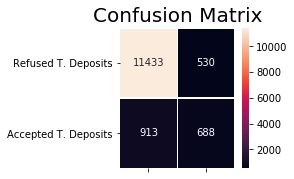

In [352]:
confusion(y_test,y_predict_gs)

In [353]:
print(classification_report(y_test,y_predict_gs))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11963
           1       0.56      0.43      0.49      1601

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.75      0.69      0.71     13564
weighted avg       0.88      0.89      0.89     13564



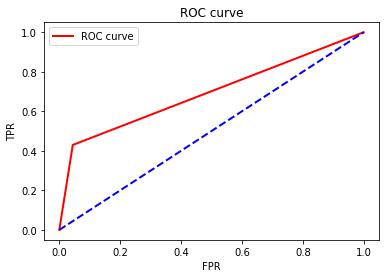

Area Under the ROC Curve is 0.6702


In [354]:
rocauc(y_test,y_predict_gs)
print('Area Under the ROC Curve is %.4f' % area)

In [355]:
# After grid search and choosing the best estimators, the decision tree classifier doesnot overfit.  
# The decision tree model desired without overfit is 
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
            splitter='best')

- The over fit model of Decision tree is converted to a realistic model by performing grid search on its hyperparameter

RANDOM FOREST

In [372]:
# Initial Random forest classifier
clfRF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=18, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [373]:
param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10,], 
              "n_estimators": [50, 100, 400]}

In [374]:
gs_rf = GridSearchCV(estimator=clfRF, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose = 1)

In [375]:
gs_rf=gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  8.3min finished


In [376]:
gs_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [377]:
gs_rf.best_score_

0.9015072518722154

In [378]:
y_predict_gs_rf = gs_rf.predict(X_test)

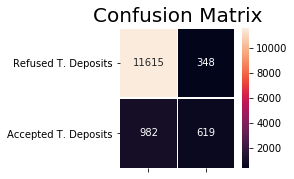

In [379]:
confusion(y_test,y_predict_gs_rf)

In [380]:
print(classification_report(y_test,y_predict_gs_rf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11963
           1       0.64      0.39      0.48      1601

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



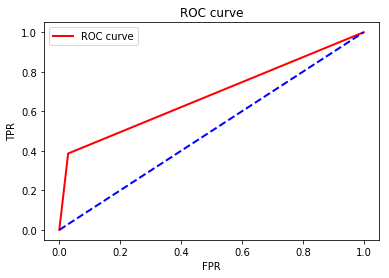

0.678771830466445

In [381]:
rocauc(y_test,y_predict_gs_rf)

- The over fit model of Random Forest is converted to a realistic model by performing grid search on its hyperparameter

SUPPORT VECTOR CLASSIFIER

In [384]:
#Initial SVM Classifier
clfSVC

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1000,
  shrinking=True, tol=0.001, verbose=False)

In [385]:
param_grid = {'C': [0.1,1, 10, 100], 
     'gamma': [1,0.1,0.01,0.001], 
     'kernel': ['rbf','sigmoid']}

In [386]:
gs_svc = GridSearchCV(estimator=clfSVC, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1,verbose=3)

In [387]:
gs_svc=gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  8.1min finished


In [388]:
gs_svc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [389]:
gs_svc.best_score_

0.9012544632982589

In [392]:
y_predict_gs_svc = gs_svc.predict(X_test)

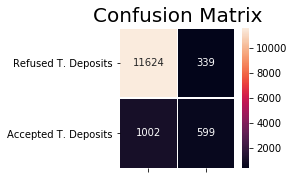

In [393]:
confusion(y_test,y_predict_gs_svc)

In [395]:
print(classification_report(y_test,y_predict_gs_svc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11963
           1       0.64      0.37      0.47      1601

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



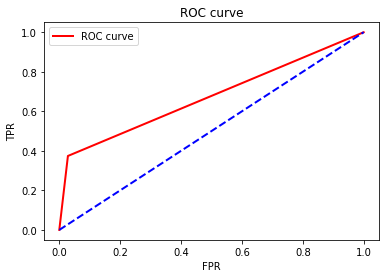

0.6729018941026943

In [396]:
rocauc(y_test,y_predict_gs_svc)

- The Grid Search on the Support Vector Classifier improved the recall value of class 1 and the AUC under ROC curve.  Accuracy
  is also at 90% at par with other classifiers

# BAGGING CLASSIFIERS

In [397]:
from sklearn.ensemble import BaggingClassifier

In [398]:
Models = []
Models.append(('Logistic Regression', clfLR))
Models.append(('Naive Bayes', clfNB))
Models.append(('K-Nearest Neighbour',clfKNN))
Models.append(('Decision Tree', clfDT))
Models.append(('Support Vector Classifier', clfSVC))
Models.append(('Random Forest',clfRF))
Models.append(('Gradeint Boosting', clfGB))

In [399]:
name = []
Bagging_score = []
for name,model in Models:
    model_bagging = BaggingClassifier(base_estimator = model,n_estimators=50,max_samples=.7 , oob_score=True,random_state = seed,n_jobs = -1)
    y_predict_bagging = model_bagging.fit(X_train,y_train)
    score_bagging = model_bagging.oob_score_
    Bagging_score.append(score_bagging)
    print('Bagging score of model %s is %.3f' %(name,score_bagging))
    
    
    
    

    
    


Bagging score of model Logistic Regression is 0.891
Bagging score of model Naive Bayes is 0.850
Bagging score of model K-Nearest Neighbour is 0.892
Bagging score of model Decision Tree is 0.898
Bagging score of model Support Vector Classifier is 0.894
Bagging score of model Random Forest is 0.901
Bagging score of model Gradeint Boosting is 0.900


In [401]:
Bagging_score

[0.8906689417638323,
 0.849590798495908,
 0.8918696874901254,
 0.8982210004107815,
 0.8942079817992227,
 0.9007804847220906,
 0.8998009289980093]

In [402]:
d_test_bagging = {'Classifiers': ['Logistic Regession', 'Naive Bayes', 'K Nearest Neighbor', 'Decision Tree', 'Support Vector Classifier',
                    'Random Forest', 'Gradient Boosting'],
                     'Test Score' : np.array(score_test),
                     'Bagging Score' : np.array(Bagging_score)
         }

Classifier_test_bagging = pd.DataFrame(data = d_test_bagging)

In [403]:
Classifier_test_bagging

,Classifiers,Test Score,Bagging Score
0,Logistic Regession,0.890224,0.890669
1,Naive Bayes,0.861398,0.849591
2,K Nearest Neighbor,0.912710,0.891870
3,Decision Tree,1.000000,0.898221
4,Support Vector Classifier,0.902462,0.894208
5,Random Forest,0.996682,0.900780
6,Gradient Boosting,0.911531,0.899801


- It can be clearly seen that the bagging classifier tries the reduce the overfit done by Decision tree and the Random forest algorithms in
 the training stage.  The error due to variance in these models is reduced by bagging technique

In [404]:
Models

[('Logistic Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=1000, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('K-Nearest Neighbour',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
              splitter='best')),
 ('Support Vector Classifier',
  SVC(C=1.0, cache_size

# ADAPTIVE BOOSTING

In [405]:
from sklearn.ensemble import AdaBoostClassifier

In [406]:
Models = []
Models.append(('Logistic Regression', clfLR))
Models.append(('Naive Bayes', clfNB))
Models.append(('Decision Tree', clfDT))


In [407]:
name = []
Boosting_score = []
for name,model in Models:
    model_boosting = AdaBoostClassifier(base_estimator=model, n_estimators=50, random_state = seed,algorithm = 'SAMME.R')
    model_boosting.fit(X_train,y_train)
    score_boosting = model_bagging.oob_score_
    Boosting_score.append(score)
    print('Boosting score of model %s is %.3f' %(name,score_boosting))
    

Boosting score of model Logistic Regression is 0.900
Boosting score of model Naive Bayes is 0.900
Boosting score of model Decision Tree is 0.900


In [408]:
d_test_boosting = {'Classifiers': ['Logistic Regession', 'Naive Bayes', 'Decision Tree'],
                                           'Boosting Score' : np.array(Boosting_score)
         }

Classifier_test_boosting = pd.DataFrame(data = d_test_boosting)

In [409]:
Classifier_test_boosting

,Classifiers,Boosting Score
0,Logistic Regession,0.900022
1,Naive Bayes,0.900022
2,Decision Tree,0.900022


In [410]:
Models

[('Logistic Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=1000, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
              splitter='best'))]

# Conclusions


- Logistic Regression, KNearest Neighbours, Naive Bayes, Decision tree, Random Forest and Gradient descent models are checked 
  in modelling with 5 fold cross validation in training phase.  Clarification report and confusin matrix of each model is obtained with Area under ROC Curve
    
- Gradient boosting does well in terms of 'Cross Validation accuracy' and 'Decision Tree' does well in 'Area Under ROC Curve' parameter
  in the training phase.  Decision tree and random forest algorithms found to give overfit models in the testing phase
    
- The Grid Search is used to select the hyper parameters of Logistic regression, Decision tree, random forest and support vector classifier.  The 
  overfit problem of decision tree is solved by fitting on the best fit model obtained during the testing phase 

- The Ensemble technique Bagging is applied on all the base models used in modelling of the dataset.  It was found that the
  Bagging solves the overfit problem of decision tree and random forest as it was giving a realistic scores of the model.
    
- Bagging was found to decrease the error due to bias on all the models, as the score on base model is more than the score using 
  the bagging ensemble technique

- Adapting Boosting Ensemble is used on Logistic Regression, Naive Bayes and Decision tree which supports the weighted sample 
  method requied for Adaboosting.  It was found that the score of all these models increased compared to the base scores.
    
- Finally, Gradient Boosting model is found to be best model for the dataset as it does well in both training and the testing
  with almost equal scores and good recall values for the class 1 also


